In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_train = pd.read_csv('train_indessa.csv')

In [4]:
df_train.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [5]:
df_train.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

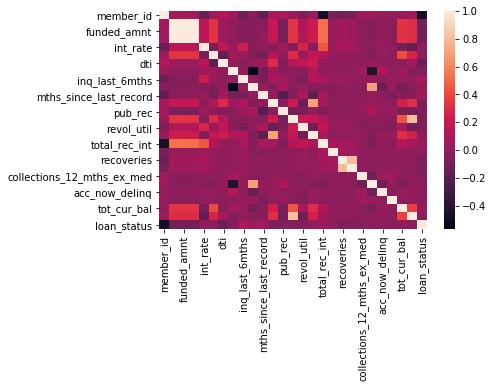

In [6]:
sns.heatmap(df_train.corr())

In [7]:
df_train = df_train.drop(['desc','term'],axis=1)

In [8]:
num_cols = df_train.select_dtypes(include=['number']).columns.values

for col in num_cols:
  med = df_train[col].median()
  df_train[col] = df_train[col].fillna(med)

In [9]:
non_num_cols = df_train.select_dtypes(exclude=['number']).columns.values

for col in num_cols:
  mode = df_train[col].mode()[0]
  df_train[col] = df_train[col].fillna(mode)

In [10]:
df_train.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          0
verification_status                 0
pymnt_plan                          0
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
inq_last_6mths                      0
mths_since_last_delinq              0
mths_since_last_record              0
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util  

In [11]:
df_dummies = pd.get_dummies(non_num_cols)

In [12]:
df_dummies.head()

,addr_state,application_type,batch_enrolled,emp_length,emp_title,grade,home_ownership,initial_list_status,last_week_pay,purpose,pymnt_plan,sub_grade,title,verification_status,verification_status_joint,zip_code
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df_train = pd.concat([df_train,df_dummies],axis=1)

In [15]:
df_train = df_train.drop(non_num_cols,axis=1)

In [16]:
df_train.isnull().sum()

member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
int_rate                       0
annual_inc                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
total_rev_hi_lim               0
loan_status                    0
dtype: int64

In [17]:
X = df_train.drop(['loan_status'],axis=1)

In [18]:
y = df_train['loan_status']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 18)

In [20]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
from sklearn.metrics import roc_auc_score

y_pred = classifier.predict(X_test)
roc_auc_score(y_test, y_pred)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


0.7804620157418896

In [24]:
df_test = pd.read_csv('test_indessa.csv')

In [26]:
df_test = df_test.drop(['desc','term'],axis=1)

In [27]:
df_test.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
batch_enrolled                  45599
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       20629
emp_length                      17934
home_ownership                      0
annual_inc                          1
verification_status                 0
pymnt_plan                          0
purpose                             0
title                              62
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        13
inq_last_6mths                     13
mths_since_last_delinq         181758
mths_since_last_record         300021
open_acc                           13
pub_rec                            13
revol_bal                           0
revol_util  

In [28]:
num_cols = df_test.select_dtypes(include=['number']).columns.values

for col in num_cols:
  med = df_test[col].median()
  df_test[col] = df_test[col].fillna(med)

In [29]:
non_num_cols = df_test.select_dtypes(exclude=['number']).columns.values

for col in num_cols:
  mode = df_test[col].mode()[0]
  df_test[col] = df_test[col].fillna(mode)

In [30]:
df_dummies = pd.get_dummies(non_num_cols)

In [31]:
df_dummies.head()

,addr_state,application_type,batch_enrolled,emp_length,emp_title,grade,home_ownership,initial_list_status,last_week_pay,purpose,pymnt_plan,sub_grade,title,verification_status,verification_status_joint,zip_code
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
df_test = pd.concat([df_test,df_dummies],axis=1)

In [33]:
df_test = df_test.drop(non_num_cols,axis=1)

In [34]:
df_test['loan_status'] = 0.5

In [35]:
X = df_test.iloc[:, 1:].values
sc_X = StandardScaler()
X_sample_test = sc_X.fit_transform(X)

In [36]:
predictions = classifier.predict_proba(X_sample_test)

In [37]:
print(predictions[:, 1])

[0.04715441 0.12994988 0.0880904  ... 0.0463686  0.31419787 0.45789918]


In [38]:
df_test['loan_status'] = predictions[:,1]

In [39]:
df_test.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,11937648,14000,14000,14000.0,16.24,73500.0,28.65,1.0,1.0,20.0,...,0.0,0.0,0.0,0.0,44.0,0.0,0.0,85230.0,45700.0,0.047154
1,38983318,16000,16000,16000.0,9.49,105000.0,31.19,0.0,0.0,31.0,...,0.0,0.0,0.0,0.0,44.0,0.0,0.0,444991.0,21400.0,0.129950
2,27999917,11050,11050,11050.0,15.61,62300.0,21.73,1.0,0.0,23.0,...,0.0,0.0,0.0,0.0,26.0,0.0,0.0,105737.0,16300.0,0.088090
3,61514932,35000,35000,34700.0,12.69,150000.0,17.27,0.0,0.0,31.0,...,0.0,0.0,0.0,0.0,44.0,0.0,0.0,287022.0,72400.0,0.051778
4,59622821,6500,6500,6500.0,6.89,52000.0,20.19,0.0,0.0,31.0,...,0.0,0.0,0.0,0.0,44.0,0.0,0.0,234278.0,26700.0,0.351098


In [40]:
sample_submission = df_test[['member_id','loan_status']]
sample_submission.to_csv('sample_submission.csv', index = False)